In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Our method applied to stance datasets

## GWSD

In [2]:
dataset = "GWSD"

In [3]:
df_gwsd = pd.read_csv(f"../data/df_shuffled_{dataset}.csv") # from Luo et al (2020), not shared

In [4]:
gwsd_action_pred = pd.read_csv(f"../data/predictions/predictions_roberta_simplified_synthetic_weights_{dataset}.csv")

In [5]:
df_gwsd["pred_collective_action"] = ["Participation in\ncollective action" if x==0 else "None" for x in gwsd_action_pred["predictions"]]

In [6]:
# assign a label to each row depending on which value between "disagree", "agree" and "neutral" is the highest
df_gwsd["label"] = df_gwsd[["disagree", "agree", "neutral"]].idxmax(axis=1)

# count nan values
nan_count = df_gwsd["label"].isna().sum()
print(f"nan count: {nan_count}")

nan count: 250


In [7]:
df_gwsd["label"].value_counts()

neutral     873
agree       777
disagree    400
Name: label, dtype: int64

In [8]:
# print pred_collective_action value counts for each label
print(df_gwsd.groupby("label")["pred_collective_action"].value_counts())

label     pred_collective_action             
agree     None                                   451
          Participation in\ncollective action    326
disagree  None                                   307
          Participation in\ncollective action     93
neutral   None                                   628
          Participation in\ncollective action    245
Name: pred_collective_action, dtype: int64


/tmp/ipykernel_4035412/2660587131.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_gwsd.groupby(['label', 'pred_collective_action'])
/tmp/ipykernel_4035412/2660587131.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


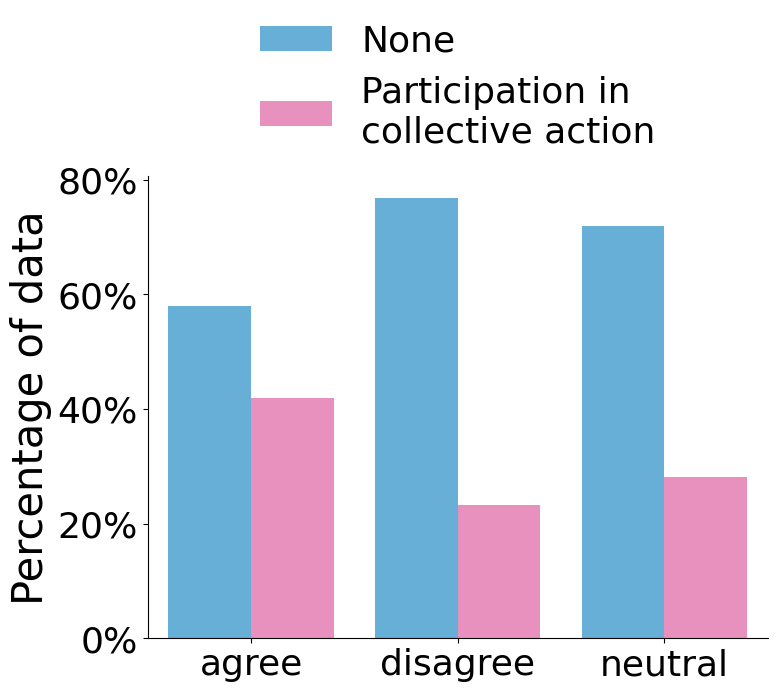

In [9]:
df_normalized = (
    df_gwsd.groupby(['label', 'pred_collective_action'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .reset_index(name='percentage')
)

# Plot the normalized percentages
plt.figure(figsize=(8,6))
sns.barplot(
    x="label", 
    y="percentage", 
    hue="pred_collective_action", 
    data=df_normalized,
    palette=["#56B4E9", "#F781BF"] 
)
# Add labels and title
plt.ylabel('Percentage of data', fontsize=30)
plt.xlabel('')
plt.legend(
    fontsize=26, 
    loc='upper center',  # Place it at the top center
    bbox_to_anchor=(0.5, 1.4),  # Move outside the box
    ncol=1,
    framealpha = 0.0
)

# font size
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Reduce number of ticks on y axis
plt.locator_params(axis='y', nbins=5)

# Change y ticks to percentages
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

# Remove top and right borders
sns.despine()

plt.show()
